#                               Research on car sales ads


In this project we have data with <i>free advertisements for vehicles</i>. The goal is to study data collected over the last few years and determine which factors influence the price of a vehicle.
The dataset contains the following fields:
<ol>
    <li>price</li>
<li>model_year</li>
<li>model</li>
<li>condition</li>
<li>cylinders</li>
<li>fuel — gas, diesel, etc.</li>
<li>odometer — the vehicle's mileage when the ad was published</li>
<li>transmission</li>
<li>paint_color</li>
<li>is_4wd — whether the vehicle has 4-wheel drive (Boolean type)</li>
<li>date_posted — the date the ad was published</li>
<li>days_listed — from publication to removal</li>
</ol>
    
#### Let's move on and study the data more thorougly.    

## Step 1

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
try:
    vehicles_data = pd.read_csv('/datasets/vehicles_us.csv')
except IOError as e:
    print(e) 

In [3]:
vehicles_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 13 columns):
price           51525 non-null int64
model_year      47906 non-null float64
model           51525 non-null object
condition       51525 non-null object
cylinders       46265 non-null float64
fuel            51525 non-null object
odometer        43633 non-null float64
transmission    51525 non-null object
type            51525 non-null object
paint_color     42258 non-null object
is_4wd          25572 non-null float64
date_posted     51525 non-null object
days_listed     51525 non-null int64
dtypes: float64(4), int64(2), object(7)
memory usage: 5.1+ MB


In [4]:
vehicles_data.head(5)

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
0,9400,2011.0,bmw x5,good,6.0,gas,145000.0,automatic,SUV,NaN,1.0,2018-06-23,19
1,25500,NaN,ford f-150,good,6.0,gas,88705.0,automatic,pickup,white,1.0,2018-10-19,50
2,5500,2013.0,hyundai sonata,like new,4.0,gas,110000.0,automatic,sedan,red,NaN,2019-02-07,79
3,1500,2003.0,ford f-150,fair,8.0,gas,NaN,automatic,pickup,NaN,NaN,2019-03-22,9
4,14900,2017.0,chrysler 200,excellent,4.0,gas,80903.0,automatic,sedan,black,NaN,2019-04-02,28


I opened the data and start to analyse the columns. First of all we see missing values at columns: model_year, cylinders ,odometer,paint_color,is_4wd
Now I want to understand what is the procent of missing values. So we have 7% missing in model_year, 10% missing in cylinders, 15% in odometer, 17% paint_color, 50% of "is_4wd" column. I've decided that all the missing data under 15% I'll replace with the mean values, paint_colour we can't replace with the mean, so I'll put an "unknown" and 50% of the column "is_4wd" is filled with 1, so I understand that it is actually the car that is 4_wd, that why we can just put 0,that will mean the car is not 4_wd.

## Data preprocessing


In [5]:
vehicles_data.isnull().sum()/len(vehicles_data)*100

price            0.000000
model_year       7.023775
model            0.000000
condition        0.000000
cylinders       10.208637
fuel             0.000000
odometer        15.316836
transmission     0.000000
type             0.000000
paint_color     17.985444
is_4wd          50.369723
date_posted      0.000000
days_listed      0.000000
dtype: float64

In [6]:
vehicles_data['is_4wd'].value_counts()

1.0    25572
Name: is_4wd, dtype: int64

There are 2 types of values (1 if the vehicle is_4wd, and Nan - if not). So my logic is to replace the column with True/False meanings.

In [7]:
vehicles_data['is_4wd']= vehicles_data['is_4wd'].fillna(False)

In [8]:
vehicles_data['is_4wd'].isnull().sum()

0

In [9]:
vehicles_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 13 columns):
price           51525 non-null int64
model_year      47906 non-null float64
model           51525 non-null object
condition       51525 non-null object
cylinders       46265 non-null float64
fuel            51525 non-null object
odometer        43633 non-null float64
transmission    51525 non-null object
type            51525 non-null object
paint_color     42258 non-null object
is_4wd          51525 non-null object
date_posted     51525 non-null object
days_listed     51525 non-null int64
dtypes: float64(3), int64(2), object(8)
memory usage: 5.1+ MB


Now we fixed the column (4_wd) and we don't have missing data there

In [10]:
vehicles_data.describe(include='all')

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
count,51525.000000,47906.000000,51525,51525,46265.000000,51525,43633.000000,51525,51525,42258,51525,51525,51525.00000
unique,NaN,NaN,100,6,NaN,5,NaN,3,13,12,2,354,NaN
top,NaN,NaN,ford f-150,excellent,NaN,gas,NaN,automatic,SUV,white,False,2019-03-17,NaN
freq,NaN,NaN,2796,24773,NaN,47288,NaN,46902,12405,10029,25953,186,NaN
mean,12132.464920,2009.750470,NaN,NaN,6.125235,NaN,115553.461738,NaN,NaN,NaN,NaN,NaN,39.55476
std,10040.803015,6.282065,NaN,NaN,1.660360,NaN,65094.611341,NaN,NaN,NaN,NaN,NaN,28.20427
min,1.000000,1908.000000,NaN,NaN,3.000000,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,0.00000
25%,5000.000000,2006.000000,NaN,NaN,4.000000,NaN,70000.000000,NaN,NaN,NaN,NaN,NaN,19.00000
50%,9000.000000,2011.000000,NaN,NaN,6.000000,NaN,113000.000000,NaN,NaN,NaN,NaN,NaN,33.00000
75%,16839.000000,2014.000000,NaN,NaN,8.000000,NaN,155000.000000,NaN,NaN,NaN,NaN,NaN,53.00000


In [11]:
vehicles_data.head()

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
0,9400,2011.0,bmw x5,good,6.0,gas,145000.0,automatic,SUV,NaN,1,2018-06-23,19
1,25500,NaN,ford f-150,good,6.0,gas,88705.0,automatic,pickup,white,1,2018-10-19,50
2,5500,2013.0,hyundai sonata,like new,4.0,gas,110000.0,automatic,sedan,red,False,2019-02-07,79
3,1500,2003.0,ford f-150,fair,8.0,gas,NaN,automatic,pickup,NaN,False,2019-03-22,9
4,14900,2017.0,chrysler 200,excellent,4.0,gas,80903.0,automatic,sedan,black,False,2019-04-02,28


Next step is to count median of model_year, cylinders and odometer to put all the missing data.
After that I want to change float type of data to int type in columns (model_year, odometer, cylinders) and the column is_4wd change to boolean.

In [12]:
vehicles_data['model_year'].median()

2011.0

In [13]:
vehicles_data['model_year'].describe()

count    47906.000000
mean      2009.750470
std          6.282065
min       1908.000000
25%       2006.000000
50%       2011.000000
75%       2014.000000
max       2019.000000
Name: model_year, dtype: float64

In [14]:
vehicles_data['cylinders'].describe()

count    46265.000000
mean         6.125235
std          1.660360
min          3.000000
25%          4.000000
50%          6.000000
75%          8.000000
max         12.000000
Name: cylinders, dtype: float64

In [15]:
vehicles_data['odometer'].describe()

count     43633.000000
mean     115553.461738
std       65094.611341
min           0.000000
25%       70000.000000
50%      113000.000000
75%      155000.000000
max      990000.000000
Name: odometer, dtype: float64

In [16]:
vehicles_data.loc[vehicles_data['model_year'].isna(), 'model_year'] = vehicles_data['model_year'].median()
vehicles_data.loc[vehicles_data['cylinders'].isna(), 'cylinders'] = vehicles_data['cylinders'].median()
vehicles_data.loc[vehicles_data['odometer'].isna(), 'odometer'] = vehicles_data['odometer'].median()

In [17]:
vehicles_data.sample(10)

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
26896,6500,2012.0,ford fusion se,excellent,4.0,gas,104000.0,automatic,sedan,red,False,2019-03-16,56
39536,15500,2016.0,chevrolet equinox,excellent,4.0,gas,41000.0,automatic,SUV,black,False,2018-12-26,18
14652,13900,2010.0,ford f-150,excellent,8.0,gas,133327.0,automatic,truck,silver,False,2018-12-02,51
48957,21900,2008.0,chevrolet silverado 3500hd,excellent,8.0,diesel,203000.0,automatic,truck,white,1,2018-12-22,36
30408,7500,2013.0,nissan altima,excellent,4.0,gas,111000.0,automatic,sedan,grey,False,2018-10-04,49
46984,5400,2009.0,subaru forester,excellent,4.0,gas,162491.0,automatic,wagon,white,1,2018-12-29,16
12456,3950,2007.0,ford explorer,good,8.0,gas,168000.0,automatic,SUV,NaN,False,2018-09-23,61
29555,42000,2018.0,ram 2500,like new,6.0,diesel,113000.0,automatic,truck,black,1,2018-10-02,40
34744,7799,2012.0,hyundai elantra,excellent,4.0,gas,123900.0,automatic,sedan,red,False,2018-12-25,9
45733,24800,2014.0,chevrolet silverado 2500hd,good,8.0,gas,32915.0,automatic,truck,blue,False,2018-09-04,56


In [18]:
vehicles_data['paint_color'].unique()

array([nan, 'white', 'red', 'black', 'blue', 'grey', 'silver', 'custom',
       'orange', 'yellow', 'brown', 'green', 'purple'], dtype=object)

In [19]:
vehicles_data["paint_color"].fillna("unknown", inplace = True) 

In [20]:
vehicles_data["paint_color"].isnull().sum()

0

In [21]:
vehicles_data['paint_color'].unique()

array(['unknown', 'white', 'red', 'black', 'blue', 'grey', 'silver',
       'custom', 'orange', 'yellow', 'brown', 'green', 'purple'],
      dtype=object)

Now I want to change data type from float to int in columns:
    model_year
    cylinders
    odometer

In [22]:
vehicles_data['model_year'] = vehicles_data['model_year'].astype('int64')

In [23]:
vehicles_data['cylinders'] = vehicles_data['cylinders'].astype('int64')

In [24]:
vehicles_data['odometer'] = vehicles_data['odometer'].astype('int64')

In [25]:
vehicles_data['is_4wd'] = vehicles_data['is_4wd'].astype(bool)

In [26]:
vehicles_data.describe()

,price,model_year,cylinders,odometer,days_listed
count,51525.000000,51525.000000,51525.000000,51525.000000,51525.00000
mean,12132.464920,2009.838234,6.112450,115162.352179,39.55476
std,10040.803015,6.065836,1.573784,59909.264385,28.20427
min,1.000000,1908.000000,3.000000,0.000000,0.00000
25%,5000.000000,2007.000000,4.000000,79181.000000,19.00000
50%,9000.000000,2011.000000,6.000000,113000.000000,33.00000
75%,16839.000000,2014.000000,8.000000,146541.000000,53.00000
max,375000.000000,2019.000000,12.000000,990000.000000,271.00000


In [93]:
vehicles_data['is_4wd'].value_counts()

False    25953
True     25572
Name: is_4wd, dtype: int64

In [27]:
vehicles_data['date_posted'] = pd.to_datetime(vehicles_data['date_posted'])

Also I changed the date, when the ad was posted to the readable date format

In [28]:
vehicles_data.head()

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
0,9400,2011,bmw x5,good,6,gas,145000,automatic,SUV,unknown,True,2018-06-23,19
1,25500,2011,ford f-150,good,6,gas,88705,automatic,pickup,white,True,2018-10-19,50
2,5500,2013,hyundai sonata,like new,4,gas,110000,automatic,sedan,red,False,2019-02-07,79
3,1500,2003,ford f-150,fair,8,gas,113000,automatic,pickup,unknown,False,2019-03-22,9
4,14900,2017,chrysler 200,excellent,4,gas,80903,automatic,sedan,black,False,2019-04-02,28


In [29]:
vehicles_data.duplicated().sum()

0

In [30]:
vehicles_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 13 columns):
price           51525 non-null int64
model_year      51525 non-null int64
model           51525 non-null object
condition       51525 non-null object
cylinders       51525 non-null int64
fuel            51525 non-null object
odometer        51525 non-null int64
transmission    51525 non-null object
type            51525 non-null object
paint_color     51525 non-null object
is_4wd          51525 non-null bool
date_posted     51525 non-null datetime64[ns]
days_listed     51525 non-null int64
dtypes: bool(1), datetime64[ns](1), int64(5), object(6)
memory usage: 4.8+ MB


I also checked if there are duplicated rows in data but there are none

### Conclusion

I checked the data, the data is almost good. We have all type of information needed to make further analysis. I fixed all the missing data and changed the data type, now it's time to make all necessary calculations

## Make calculations and add them to the table

In [31]:
vehicles_data['week'] = pd.DatetimeIndex(vehicles_data['date_posted']).weekday

In [32]:
vehicles_data['month'] = pd.DatetimeIndex(vehicles_data['date_posted']).month

In [33]:
vehicles_data['year']=pd.DatetimeIndex(vehicles_data['date_posted']).year

In [34]:
vehicles_data['vehicles_age'] = vehicles_data['year'] - vehicles_data['model_year']

In [35]:
def mileage_count(row):
    if row['vehicles_age'] == 0:
        return row['odometer']
    else:
        return row['odometer'] / row['vehicles_age']

I ve calculated vehicles_age using 2 values (year, when the ad was placed and model_year)

In [36]:
vehicles_data['avg_mileage'] = vehicles_data.apply(mileage_count, axis=1)

I also added average_mileage column.

In [37]:
def condition_change(row):
    if row['condition']== 'new':
        return 5
    if row['condition']=='like new':
        return 4
    if row['condition']=='excellent':
        return 3
    if row['condition']=='good':
        return 2 
    if row['condition']=='fair':
        return 1
    if row['condition']=='salvage':
        return 0

In [38]:
vehicles_data['condition'] = vehicles_data.apply(condition_change, axis=1)

In [39]:
vehicles_data['condition'].head()

0    2
1    2
2    4
3    1
4    3
Name: condition, dtype: int64

I ve changed condition values to the numeric values, it will help us to make new countings and conclusions

In [40]:
vehicles_data.head()

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,week,month,year,vehicles_age,avg_mileage
0,9400,2011,bmw x5,2,6,gas,145000,automatic,SUV,unknown,True,2018-06-23,19,5,6,2018,7,20714.285714
1,25500,2011,ford f-150,2,6,gas,88705,automatic,pickup,white,True,2018-10-19,50,4,10,2018,7,12672.142857
2,5500,2013,hyundai sonata,4,4,gas,110000,automatic,sedan,red,False,2019-02-07,79,3,2,2019,6,18333.333333
3,1500,2003,ford f-150,1,8,gas,113000,automatic,pickup,unknown,False,2019-03-22,9,4,3,2019,16,7062.500000
4,14900,2017,chrysler 200,3,4,gas,80903,automatic,sedan,black,False,2019-04-02,28,1,4,2019,2,40451.500000


## Exploratory data analysis

Now we need to study the following parameters: price, vehicle's age when the ad was placed, mileage, number of cylinders, and condition.

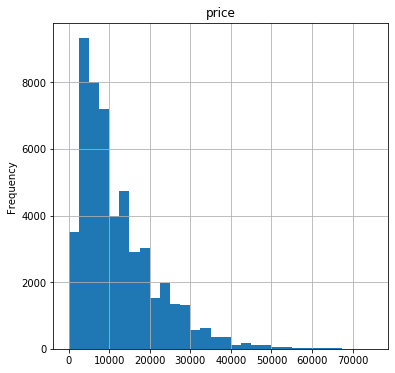

In [41]:
vehicles_data['price'].plot(kind='hist',bins=30,range=(0,75000), title='price', grid="true",figsize=(6,6))
plt.show()

I ve made hist to see what is going on with the price of our vehicles. We now figure out that the most popular price is between 5000 and 10000, however there are few cars with price more than 60000

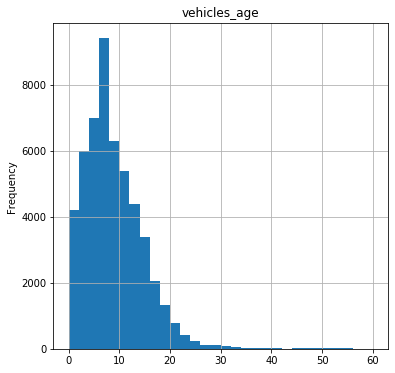

In [42]:
vehicles_data['vehicles_age'].plot(kind='hist', bins=30, range=(0,60), title='vehicles_age', grid="true",figsize=(6,6))

THe common vehicles_age is about 6-9 years, but again we have some outliers that are older than 23 years.

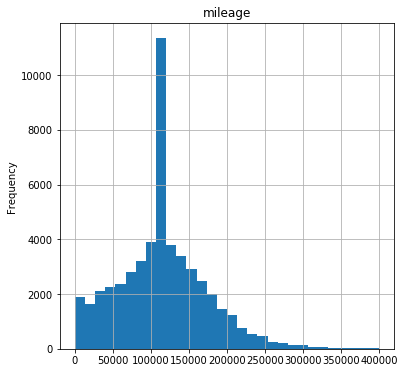

In [43]:
vehicles_data['odometer'].plot(kind='hist', bins=30, range=(0,400000), title='mileage', grid="true",figsize=(6,6))
plt.show()

The pick of mileage is at point 120 000, but we also see some with the values more than 250 000

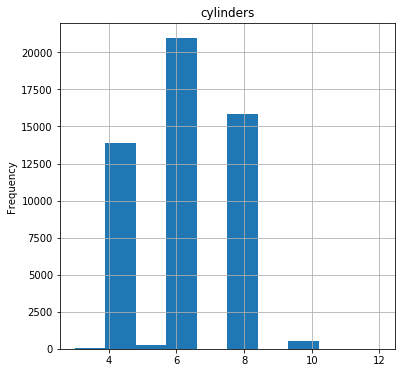

In [44]:
vehicles_data['cylinders'].plot(kind='hist',bins=10, title='cylinders', grid="true",figsize=(6,6))
plt.show()

Everything is fine with cylinders. I see nothing that is need to be fixed

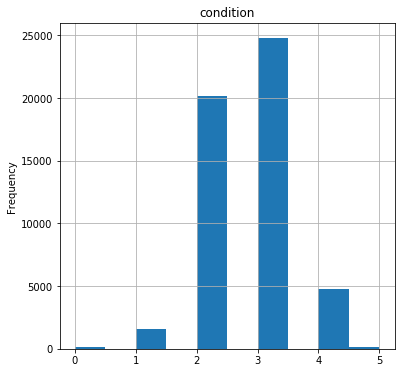

In [45]:
vehicles_data['condition'].plot(kind='hist',bins=10, title='condition', grid="true",figsize=(6,6))
plt.show()

The column Condition is also good, nothing abnormal there

To see outliers I would like to make boxplot for several parameteres.

In [46]:
vehicles_data['price'].describe()

count     51525.000000
mean      12132.464920
std       10040.803015
min           1.000000
25%        5000.000000
50%        9000.000000
75%       16839.000000
max      375000.000000
Name: price, dtype: float64

(0, 50000)

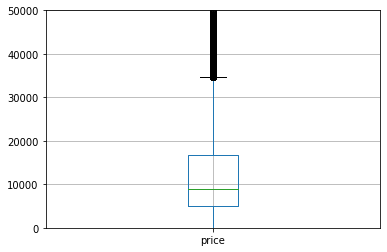

In [47]:
boxplot = vehicles_data.boxplot(column=['price'])
boxplot.plot()
plt.ylim(0,50000)

We notice that the outliers start from 35000, let's get rid of them to work on filtered data.

In [48]:
filtered_vehicles = vehicles_data.query('price <= 35000')

In [49]:
filtered_vehicles.describe()

,price,model_year,condition,cylinders,odometer,days_listed,week,month,year,vehicles_age,avg_mileage
count,50111.000000,50111.000000,50111.000000,50111.000000,50111.000000,50111.000000,50111.000000,50111.000000,50111.000000,50111.000000,50111.000000
mean,11205.937179,2009.682325,2.622498,6.080102,116879.221029,39.548123,3.005348,6.626888,2018.307597,8.625272,18816.049922
std,7954.815995,5.956012,0.705790,1.574140,59147.190605,28.195189,1.996597,3.474539,0.461503,5.970140,16234.870462
min,1.000000,1908.000000,0.000000,3.000000,0.000000,0.000000,0.000000,1.000000,2018.000000,0.000000,0.000000
25%,4995.000000,2007.000000,2.000000,4.000000,82250.000000,19.000000,1.000000,3.000000,2018.000000,5.000000,10358.071429
50%,8995.000000,2011.000000,3.000000,6.000000,113000.000000,33.000000,3.000000,7.000000,2018.000000,7.000000,15072.200000
75%,15980.000000,2014.000000,3.000000,8.000000,148000.000000,53.000000,5.000000,10.000000,2019.000000,12.000000,21903.142857
max,35000.000000,2019.000000,5.000000,12.000000,990000.000000,271.000000,6.000000,12.000000,2019.000000,110.000000,373200.000000


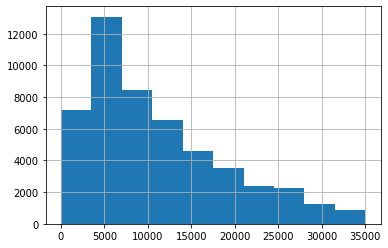

In [50]:
filtered_vehicles['price'].hist()
plt.show()

In [51]:
vehicles_data['vehicles_age'].describe()

count    51525.000000
mean         8.469229
std          6.079773
min          0.000000
25%          4.000000
50%          7.000000
75%         12.000000
max        110.000000
Name: vehicles_age, dtype: float64

I will do the dame operation with vehicles age. We see the mean is about 8.5 years. More than 23 are also outliers. 

(0, 30)

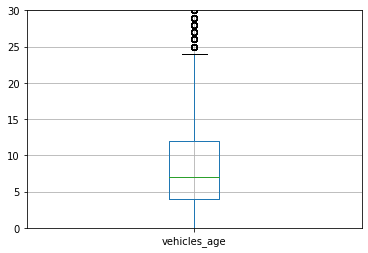

In [52]:
boxplot = vehicles_data.boxplot(column=['vehicles_age'])
boxplot.plot()
plt.ylim(0,30)

In [53]:
filtered_vehicles = vehicles_data.query('vehicles_age <= 23')

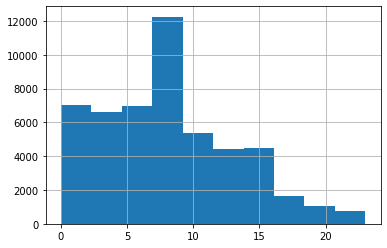

In [54]:
filtered_vehicles['vehicles_age'].hist()
plt.show()

And the last one with some useless values - 'odometer' parameter. We also clean the outliers at the point 250 000 as we will see further in the boxplot.

In [55]:
vehicles_data['odometer'].describe()

count     51525.000000
mean     115162.352179
std       59909.264385
min           0.000000
25%       79181.000000
50%      113000.000000
75%      146541.000000
max      990000.000000
Name: odometer, dtype: float64

(0, 300000)

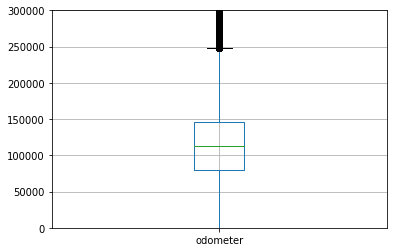

In [56]:
boxplot = vehicles_data.boxplot(column=['odometer'])
boxplot.plot()
plt.ylim(0,300000)

In [57]:
filtered_vehicles = vehicles_data.query('odometer <= 250000')

In [58]:
filtered_vehicles.describe()

,price,model_year,condition,cylinders,odometer,days_listed,week,month,year,vehicles_age,avg_mileage
count,50478.000000,50478.000000,50478.000000,50478.000000,50478.000000,50478.000000,50478.000000,50478.000000,50478.000000,50478.000000,50478.000000
mean,12259.227267,2009.968145,2.649233,6.101351,111315.657910,39.556975,3.003784,6.627858,2018.307421,8.339277,18997.454279
std,10080.625701,6.010798,0.707538,1.573597,52917.668956,28.213699,1.998188,3.473423,0.461430,6.024709,16594.343601
min,1.000000,1908.000000,0.000000,3.000000,0.000000,0.000000,0.000000,1.000000,2018.000000,0.000000,0.000000
25%,5000.000000,2007.000000,2.000000,4.000000,78000.000000,19.000000,1.000000,3.000000,2018.000000,4.000000,10272.727273
50%,9450.000000,2011.000000,3.000000,6.000000,113000.000000,33.000000,3.000000,7.000000,2018.000000,7.000000,15011.111111
75%,16950.000000,2014.000000,3.000000,8.000000,143000.000000,53.000000,5.000000,10.000000,2019.000000,11.000000,22109.300000
max,375000.000000,2019.000000,5.000000,12.000000,250000.000000,271.000000,6.000000,12.000000,2019.000000,110.000000,195700.000000


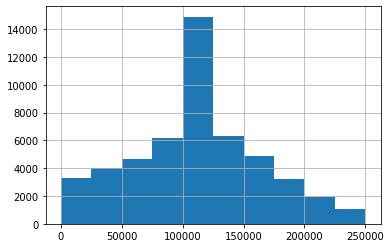

In [59]:
filtered_vehicles['odometer'].hist()
plt.show()

Now I am going to look through the days, when the ads were displayed. We need to undestanf the mean and the median. 

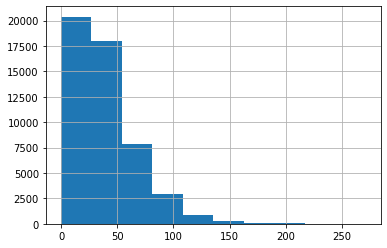

In [60]:
filtered_vehicles['days_listed'].hist()
plt.show()

The hist shows us that most of ads are removed within 35 days. 

In [61]:
filtered_vehicles['days_listed'].mean()

39.55697531597924

In [62]:
filtered_vehicles['days_listed'].median()

33.0

In [63]:
filtered_vehicles['days_listed'].describe()

count    50478.000000
mean        39.556975
std         28.213699
min          0.000000
25%         19.000000
50%         33.000000
75%         53.000000
max        271.000000
Name: days_listed, dtype: float64

I ve categorized the ads by the time when they were listed. We have 25% of data that are sold withtin 19 days, it is really fast ones. Also we see some ads that were listed extremely long for 271 days maximem

In [64]:
def lifetime_func(row):
    if row['days_listed'] <= 19:
        return 'fast'
    if row['days_listed'] <= 33 and row['days_listed'] >19:
        return 'normal'
    if row['days_listed'] <=53 and row['days_listed'] >33:
        return 'slow'
    else:
        return 'extra_slow' 

In [65]:
filtered_vehicles['sell_rate'] = filtered_vehicles.apply(lifetime_func, axis=1)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [66]:
filtered_vehicles['sell_rate'].head()

0          fast
1          slow
2    extra_slow
3          fast
4        normal
Name: sell_rate, dtype: object

In [67]:
filtered_vehicles.head()

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,week,month,year,vehicles_age,avg_mileage,sell_rate
0,9400,2011,bmw x5,2,6,gas,145000,automatic,SUV,unknown,True,2018-06-23,19,5,6,2018,7,20714.285714,fast
1,25500,2011,ford f-150,2,6,gas,88705,automatic,pickup,white,True,2018-10-19,50,4,10,2018,7,12672.142857,slow
2,5500,2013,hyundai sonata,4,4,gas,110000,automatic,sedan,red,False,2019-02-07,79,3,2,2019,6,18333.333333,extra_slow
3,1500,2003,ford f-150,1,8,gas,113000,automatic,pickup,unknown,False,2019-03-22,9,4,3,2019,16,7062.500000,fast
4,14900,2017,chrysler 200,3,4,gas,80903,automatic,sedan,black,False,2019-04-02,28,1,4,2019,2,40451.500000,normal


In [68]:
sell_rate_stat = filtered_vehicles.pivot_table(index='sell_rate', values=['price','type','vehicles_age','odometer','condition'])

In [69]:
sell_rate_stat

,condition,odometer,price,vehicles_age
sell_rate,,,,
extra_slow,2.650916,111425.273625,12267.952430,8.388367
fast,2.654570,110910.528994,12190.378771,8.310274
normal,2.642711,111362.517354,12270.136627,8.342099
slow,2.648282,111589.354849,12312.821773,8.317839


Now we start to analyze the number of ads and the average price for each type of vehicle. 
We will plot a graph showing the dependence of the number of ads on the vehicle type. 

In [70]:
type_grouped = filtered_vehicles.groupby('type')['price'].mean()

In [71]:
type_grouped

type
SUV            11248.844412
bus            17135.666667
convertible    14474.029213
coupe          14454.141543
hatchback       6914.175388
mini-van        8263.073362
offroad        14490.242857
other          11040.996047
pickup         16400.067804
sedan           7010.185379
truck          17018.726893
van            10695.048232
wagon           9203.327793
Name: price, dtype: float64

In [72]:
filtered_vehicles['type'].value_counts()

SUV            12231
sedan          12024
truck          11966
pickup          6740
coupe           2282
wagon           1504
mini-van        1145
hatchback       1032
van              622
convertible      445
other            253
offroad          210
bus               24
Name: type, dtype: int64

<function matplotlib.pyplot.show(*args, **kw)>

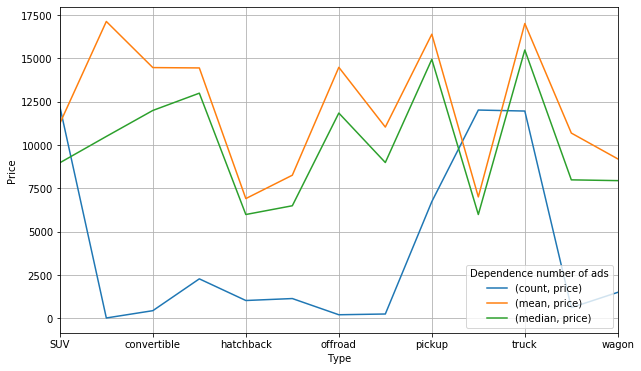

In [73]:
(filtered_vehicles
    .pivot_table(index='type', values='price', aggfunc=['count','mean','median'])
    .plot(grid=True, figsize=(10,6)))
plt.xlabel('Type')
plt.ylabel('Price')
plt.legend(title='Dependence number of ads')
plt.show

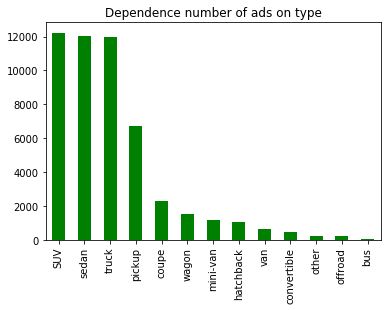

In [74]:
filtered_vehicles['type'].value_counts().plot(kind='bar', color='green', title=('Dependence number of ads on type'))
plt.show()

We can see that the most popular vehicles type is SUV and Sedan. So we'll take these two for further investigation. Now lets see the dependence of transmisiion and the price. 

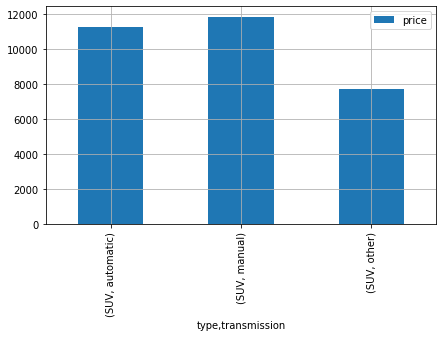

In [75]:
(filtered_vehicles
    .query('type == ["SUV"]')
    .pivot_table(index=['type','transmission'], values='price')
    .plot(kind='bar',grid=True, figsize=(7,4)))
plt.show()

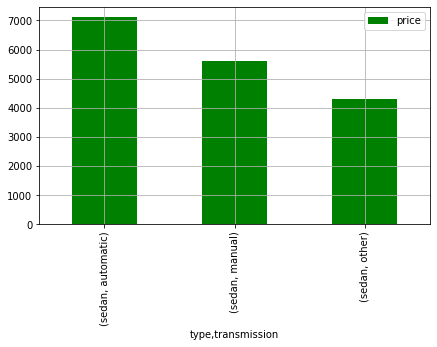

In [76]:
(filtered_vehicles
    .query('type == ["sedan"]')
    .pivot_table(index=['type','transmission'], values='price')
    .plot(kind='bar', color = 'green', grid=True, figsize=(7,4)))
plt.show()

In [77]:
filtered_by_color = filtered_vehicles.groupby('type')['paint_color'].value_counts()
filtered_by_color = filtered_vehicles.groupby('type')['paint_color'].value_counts().loc[lambda x : x>50].to_frame('num_of_ads').reset_index(drop=False)

In [78]:
price_by_color = filtered_vehicles.pivot_table(index=['type','paint_color'], values = ['price']).reset_index(drop=False)

In [79]:
color_price_full = pd.merge(filtered_by_color, price_by_color, on=["type", "paint_color"])
color_price_full_sample_SUV = color_price_full[color_price_full['type'].isin(['SUV'])].reset_index(drop=True)
color_price_full_sample_SUV.head(20)

,type,paint_color,num_of_ads,price
0,SUV,unknown,2211,11321.788331
1,SUV,black,2188,13412.207495
2,SUV,white,1937,12435.612803
3,SUV,silver,1539,10242.510071
4,SUV,grey,1176,11067.455782
5,SUV,blue,1041,9043.520653
6,SUV,red,895,10252.099441
7,SUV,green,418,8265.801435
8,SUV,brown,355,8808.588732
9,SUV,custom,301,9422.880399


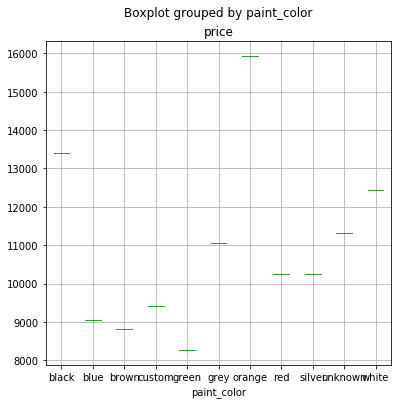

In [80]:
color_price_full_sample_SUV.boxplot(by = 'paint_color', column = ['price'], grid=True, figsize=(6,6))
plt.show()

In [81]:
color_price_full = pd.merge(filtered_by_color, price_by_color, on=["type", "paint_color"])
color_price_full_sample_sedan = color_price_full[color_price_full['type'].isin(['sedan'])].reset_index(drop=True)
color_price_full_sample_sedan.head(20)

,type,paint_color,num_of_ads,price
0,sedan,unknown,2165,6969.764434
1,sedan,silver,2030,6859.107389
2,sedan,black,1761,7575.081204
3,sedan,grey,1609,7123.095712
4,sedan,white,1490,7506.136242
5,sedan,blue,1223,6570.760425
6,sedan,red,939,6981.947817
7,sedan,custom,301,6665.299003
8,sedan,brown,252,5281.051587
9,sedan,green,199,4813.587940


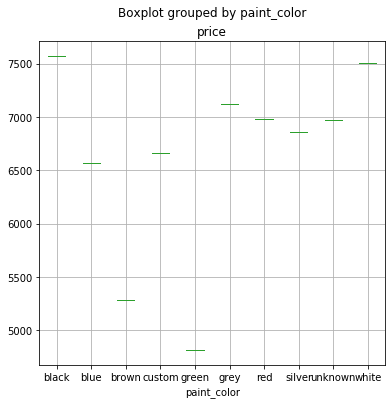

In [82]:
color_price_full_sample_sedan.boxplot(by = 'paint_color', column = ['price'], grid=True, figsize=(6,6))
plt.show()

I've made the boxplot showing us that the most expensive cars for SUV type are black and white, and among sedans the most expensive are black and grey cars, the most cheap are green and brown for both types. To do so I've grouped the price, the most popular types ('SUV and sedan) and the colors, also I ve took only colors that had more than 50 ads to make a proper analysis. Now I only have to make a scatter matrix and correlation to see the dependence of price connected to other parameters (age, mileage, condition)

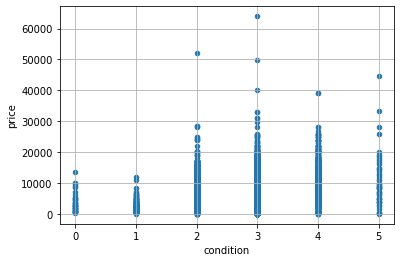

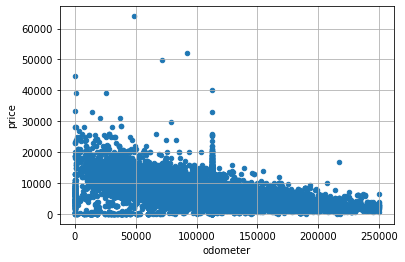

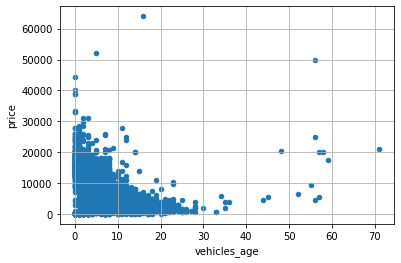

In [83]:
sedan_scatter = filtered_vehicles.query('type == ["sedan"]')
for column in ['condition', 'odometer', 'vehicles_age']:
    sedan_scatter.plot(x=column, y='price', kind='scatter', grid=True) 

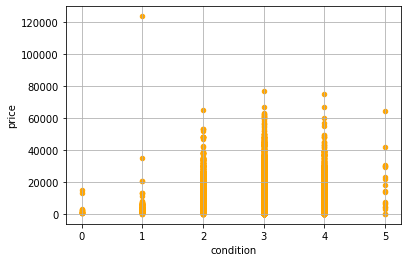

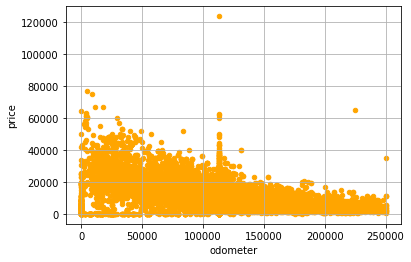

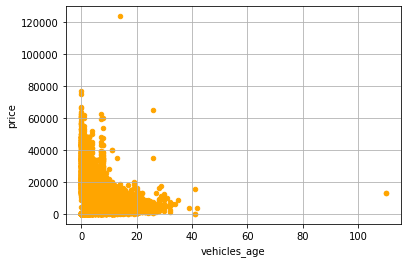

In [84]:
suv_scatter = filtered_vehicles.query('type == ["SUV"]')
for column in ['condition', 'odometer', 'vehicles_age']:
    suv_scatter.plot(x=column, y='price', kind='scatter', grid=True, color='orange') 

In [85]:
sedan_scatter['price'].corr(sedan_scatter['vehicles_age'])

-0.539681053446206

In [86]:
sedan_scatter['price'].corr(sedan_scatter['odometer'])

-0.4984946331547878

In [87]:
sedan_scatter['price'].corr(sedan_scatter['condition'])

0.28863751778431757

In [88]:
suv_scatter['price'].corr(suv_scatter['vehicles_age'])

-0.535019355331815

In [89]:
suv_scatter['price'].corr(suv_scatter['odometer'])

-0.49662852065917756

In [90]:
suv_scatter['price'].corr(suv_scatter['condition'])

0.25954733760282783

,price,condition,odometer,vehicles_age
price,1.000000,0.288638,-0.498495,-0.539681
condition,0.288638,1.000000,-0.295288,-0.279557
odometer,-0.498495,-0.295288,1.000000,0.483413
vehicles_age,-0.539681,-0.279557,0.483413,1.000000


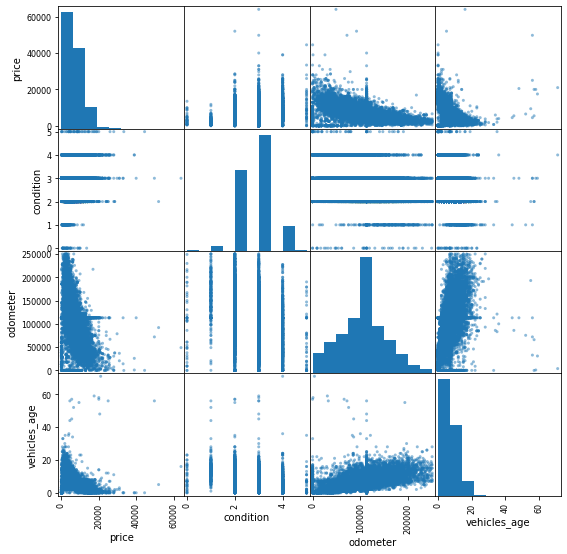

In [91]:
sedan_matrice = pd.plotting.scatter_matrix(sedan_scatter[['price','condition','odometer','vehicles_age']], figsize=(9, 9)) 
sedan_scatter[['price','condition','odometer','vehicles_age']].corr()

,price,condition,odometer,vehicles_age
price,1.000000,0.259547,-0.496629,-0.535019
condition,0.259547,1.000000,-0.303560,-0.309094
odometer,-0.496629,-0.303560,1.000000,0.516853
vehicles_age,-0.535019,-0.309094,0.516853,1.000000


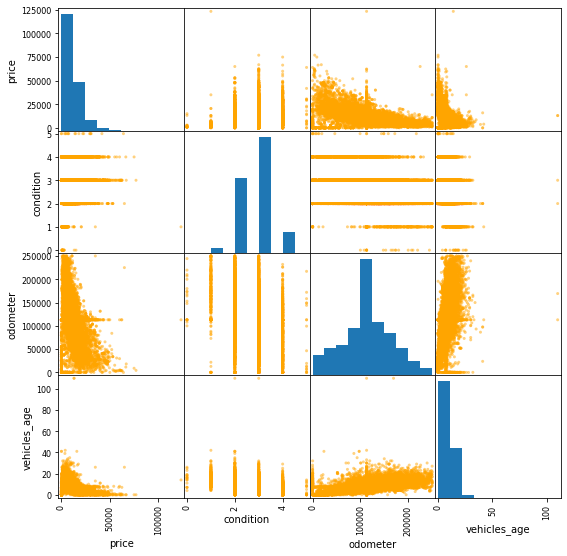

In [92]:
suv_matrice = pd.plotting.scatter_matrix(suv_scatter[['price','condition','odometer','vehicles_age']], color='orange', figsize=(9, 9)) 
suv_scatter[['price','condition','odometer','vehicles_age']].corr()

I used a correlation method and scatterplot to see the dependence of price and age of the vehicles, mileage and condition. We notice that the more is vehicles_age and the more the mileage the less is the price, the better condition the more is the price. The most popular vehicles sold are SUV, sedan and truck. The mean lifetime of the ad is 39,5 days and the median is 33. The most expensive SUV is with manual transmission and the most expensive sedan is with avtomatic transmission.

I ve changed the analysis to SUV and Sedan ceperately. We see that for the type Sedan the dependence of price from the condition is more that for the SUV type, but the dependence of price from age and mileage are the same for both types.

## Overall conclusion

We had a data with free ads and we made a researche that showed us the most popular vehicles types that are sold. (SUV, Sedan, Truck) We also figured out that the avarege time of the ad on the platform is about 39 days. The best sellers are with black white and grey colors ( nothing surprising there). And also we see the correlation between the age, mileage and condition and the price of the vehicles. We can say that the main conclusion here is that the price depends mostly on the condition and the age of the vehicle. 

# Project completion checklist

Mark the completed tasks with 'x'. Then press Shift+Enter.

- [x]  file opened
- [ ]  files explored (first rows printed, info() method)
- [ ]  missing values determined
- [ ]  missing values filled in
- [ ]  clarification of the discovered missing values provided
- [ ]  data types converted
- [ ]  explanation of which columns had the data types changed and why
- [ ]  calculated and added to the table: day of the week, month, and year the ad was placed
- [ ]  calculated and added to the table: the vehicle's age (in years) when the ad was placed
- [ ]  calculated and added to the table: the vehicle's average mileage per year
- [ ]  the following parameters investigated: price, vehicle's age when the ad was placed, mileage, number of cylinders, and condition
- [ ]  histograms for each parameter created
- [ ]  task completed: "Determine the upper limits of outliers, remove the outliers and store them in a separate DataFrame, and continue your work with the filtered data."
- [ ]  task completed: "Use the filtered data to plot new histograms. Compare them with the earlier histograms (the ones that included outliers). Draw conclusions for each histogram."
- [ ]  task completed: "Study how many days advertisements were displayed (days_listed). Plot a histogram. Calculate the mean and median. Describe the typical lifetime of an ad. Determine when ads were removed quickly, and when they were listed for an abnormally long time.  "
- [ ]  task completed: "Analyze the number of ads and the average price for each type of vehicle. Plot a graph showing the dependence of the number of ads on the vehicle type. Select the two types with the greatest number of ads. "
- [ ]  task completed: "What factors impact the price most? Take each of the popular types you detected at the previous stage and study whether the price depends on age, mileage, condition, transmission type, and color. For categorical variables (transmission type and color), plot box-and-whisker charts, and create scatterplots for the rest. When analyzing categorical variables, note that the categories must have at least 50 ads; otherwise, their parameters won't be valid for analysis.  "
- [ ]  each stage has a conclusion
- [ ]  overall conclusion drawn